Accuracy of the LDA + SVM model: 98.15%


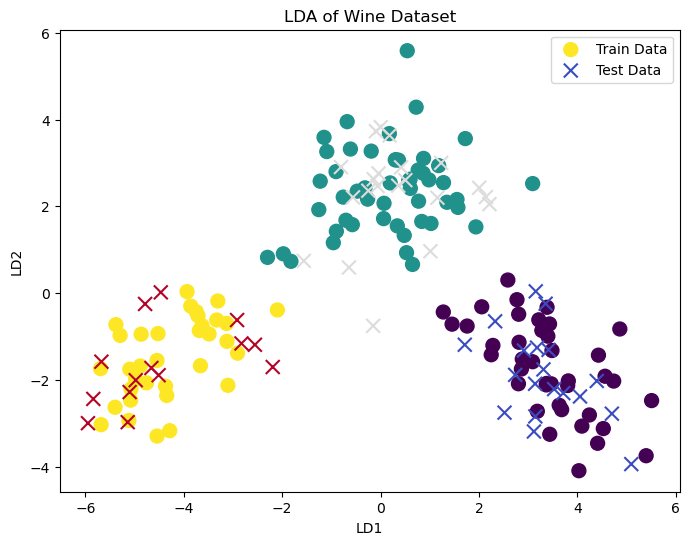

In [3]:
#write a program in python to implement linear discriminant analysis( use any pregenerated data or sample dataset of your choice 

# Step 1: Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data  # Features (13 continuous features)
y = data.target  # Target labels (3 classes)

# Step 3: Data Preprocessing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Step 5: Train a Classifier (SVM in this case)
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Step 6: Make Predictions and Evaluate Model
y_pred = svm.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the LDA + SVM model: {accuracy * 100:.2f}%')

# Step 7: Plotting the LDA result (2D projection)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', label='Train Data', s=100)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, marker='x', cmap='coolwarm', label='Test Data', s=100)
plt.title('LDA of Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()
